# **The following notebook describes how to build an image classifier from the chest x_ray data set using TensorFlow2.0/InceptionV3 and Fast.ai/Resnet50 libraries**

**TENSOR_FLOW2.0/InterceptV3**

**1-- IMPORT THE LIBRARIES**

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
tf.__version__

'1.14.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


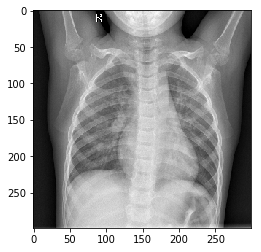

In [5]:
Sample_Image= tf.keras.preprocessing.image.load_img( '/content/drive/My Drive/x_ray.jpeg',target_size=(299,299))
plt.imshow(Sample_Image)


**2-- IMPORT *InceptionV3* MODEL WITH PRE-TRAINED WEIGHTS**

In [6]:
model = tf.keras.applications.InceptionV3(weights='imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
96116736/96112376 [==============================] - 6s 0us/step


**4-- REMOVING THE OUTPUT LAYER FROM THE BASE MODEL** 


In [7]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False)

x= base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)

87916544/87910968 [==============================] - 5s 0us/step


**5-- ADDING OUR NEW LAYERS TO THE BASE MODEL**

In [0]:
x= tf.keras.layers.Dense(1024, activation= 'relu')(x)
x= tf.keras.layers.Dense(1024, activation= 'relu')(x)
x= tf.keras.layers.Dense(1024, activation= 'relu')(x)
x= tf.keras.layers.Dense(512, activation= 'relu')(x)
preds= tf.keras.layers.Dense(2, activation= 'softmax')(x)

model= tf.keras.models.Model(inputs=base_model.input, outputs=preds)

**7-- FREEZE THE BASE_MODEL WEIGHTS**

In [0]:
for layer in model.layers[:len(base_model.layers)]:
  layer.trainable=False
  
for layer in model.layers[len(base_model.layers):]:
  layer.trainable=True

**8-- UPLOAD AND PROCESS TRAINING DATA**

In [11]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.inception_v3.preprocess_input)

train_generator= train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray/train/',
                                                  target_size= (224,224),
                                                  color_mode= 'rgb',
                                                  batch_size=32,
                                                  class_mode= 'categorical',
                                                  shuffle=True)

Found 5216 images belonging to 2 classes.


**9--TRAIN THE MODEL**
  

In [12]:
model.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit_generator(generator=train_generator, steps_per_epoch= train_generator.n//train_generator.batch_size, epochs= 10)

Epoch 1/10
163/163 [==============================] - 2357s 14s/step - loss: 0.3573 - acc: 0.8660
Epoch 2/10
163/163 [==============================] - 66s 408ms/step - loss: 0.1988 - acc: 0.9220
Epoch 3/10
163/163 [==============================] - 65s 401ms/step - loss: 0.1799 - acc: 0.9316
Epoch 4/10
163/163 [==============================] - 65s 400ms/step - loss: 0.1925 - acc: 0.9222
Epoch 5/10
163/163 [==============================] - 64s 392ms/step - loss: 0.1770 - acc: 0.9365
Epoch 6/10
163/163 [==============================] - 63s 387ms/step - loss: 0.1593 - acc: 0.9404
Epoch 7/10
163/163 [==============================] - 63s 389ms/step - loss: 0.1553 - acc: 0.9419
Epoch 8/10
163/163 [==============================] - 63s 387ms/step - loss: 0.1759 - acc: 0.9327
Epoch 9/10
163/163 [==============================] - 63s 388ms/step - loss: 0.1649 - acc: 0.9377
Epoch 10/10
163/163 [==============================] - 63s 386ms/step - loss: 0.1391 - acc: 0.9454


**9-- EVALUATE MODEL**

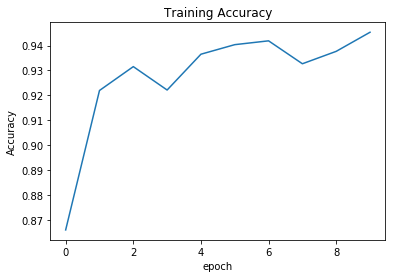

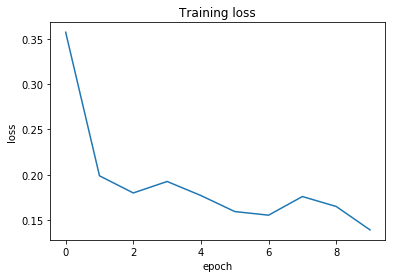

In [20]:
acc= history.history['acc']
loss= history.history['loss']

plt.figure()
plt.plot(acc, label='Training accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.figure()
plt.plot(loss, label='Training accuracy')
plt.ylabel('loss')
plt.title('Training loss')
plt.xlabel('epoch')
plt.show()

**10-- MAKE PREDICTIONS**

In [24]:
# predicting a batch of 16 chest xrays in the valid set

train_generator= train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray/valid/',
                                                  target_size= (224,224),
                                                  color_mode= 'rgb',
                                                  batch_size=16,
                                                  class_mode= 'categorical',
                                                  shuffle=True)

Found 16 images belonging to 2 classes.


In [25]:
predictions=model.predict(train_generator)
print('predictions')
print(' NORMAL        PNEUMONIA')
print( predictions)

predictions
 NORMAL        PNEUMONIA
[[1.59068644e-04 9.99840856e-01]
 [2.41376972e-03 9.97586250e-01]
 [5.81099186e-04 9.99418974e-01]
 [4.91108792e-03 9.95088875e-01]
 [1.05841719e-02 9.89415884e-01]
 [2.42451252e-03 9.97575462e-01]
 [8.26336443e-03 9.91736591e-01]
 [6.14011995e-02 9.38598871e-01]
 [1.71407778e-03 9.98285949e-01]
 [1.38256075e-02 9.86174345e-01]
 [7.91208411e-04 9.99208868e-01]
 [2.04375084e-03 9.97956276e-01]
 [8.70659365e-04 9.99129355e-01]
 [1.25130417e-03 9.98748660e-01]
 [1.27435534e-03 9.98725593e-01]
 [3.76800634e-03 9.96231973e-01]]


**Comments**
It appears that due to the class imbalance, the model only recognizes the features of the majority class 'Pneumonia'

**FAST.AI/Resnet50**

**1-- IMPORT THE LIBRARIES**

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


**2-- IMPORT AND VIEW DATA**


(['NORMAL', 'PNEUMONIA'], 2, 5216, 16)

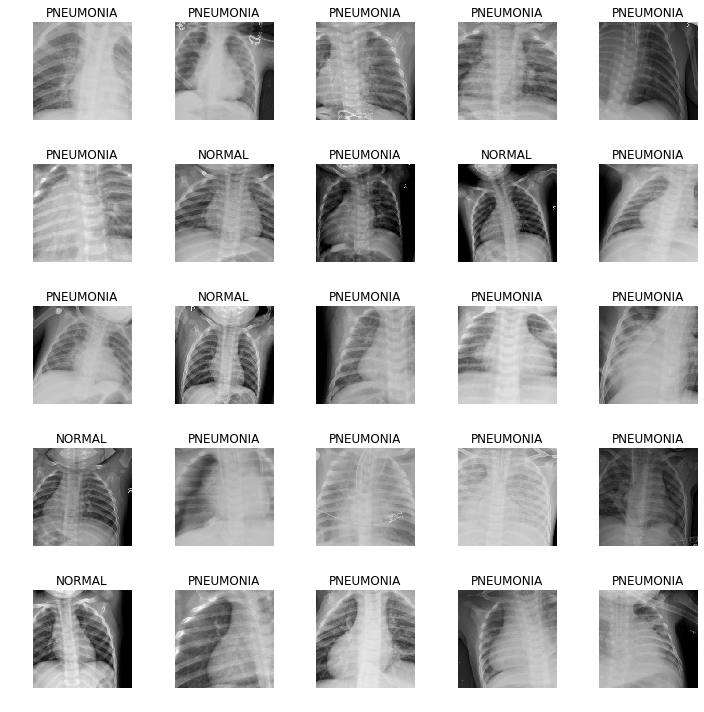

In [31]:
path=Path('/content/drive/My Drive/Colab Notebooks/chest_xray/')

data = ImageDataBunch.from_folder(path,  seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

**3-- TRAIN THE MODEL**

In [32]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

learn.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 83059667.81it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.327230,0.633678,0.250000,04:03
1,0.206372,0.374172,0.250000,04:04
2,0.149949,1.027832,0.375000,04:01
3,0.121669,0.834972,0.312500,04:00
4,0.104936,0.374891,0.187500,04:00
5,0.091810,0.453705,0.250000,04:00
6,0.094477,0.215463,0.062500,03:59
7,0.085544,0.226607,0.062500,03:58
8,0.072535,0.279824,0.062500,03:59
9,0.068928,0.265009,0.062500,03:58


In [0]:
learn.save('stage-1')

**4-- MAKE PREDICTIONS**

In [43]:
#returns predictions for the valid set
preds = learn.get_preds(with_loss=True)
preds

[tensor([[9.7582e-01, 2.4180e-02],
         [7.3841e-01, 2.6159e-01],
         [6.1562e-01, 3.8438e-01],
         [9.2461e-01, 7.5390e-02],
         [8.5946e-01, 1.4054e-01],
         [9.7034e-01, 2.9663e-02],
         [9.9045e-01, 9.5457e-03],
         [1.2307e-01, 8.7693e-01],
         [1.5987e-04, 9.9984e-01],
         [3.1488e-01, 6.8512e-01],
         [7.3100e-02, 9.2690e-01],
         [2.6054e-03, 9.9739e-01],
         [5.1491e-03, 9.9485e-01],
         [6.1187e-03, 9.9388e-01],
         [1.1573e-01, 8.8427e-01],
         [3.7601e-01, 6.2399e-01]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([2.4477e-02, 3.0325e-01, 4.8513e-01, 7.8383e-02, 1.5145e-01, 3.0112e-02,
         9.5916e-03, 2.0950e+00, 1.5974e-04, 3.7816e-01, 7.5910e-02, 2.6088e-03,
         5.1625e-03, 6.1374e-03, 1.2299e-01, 4.7161e-01])]

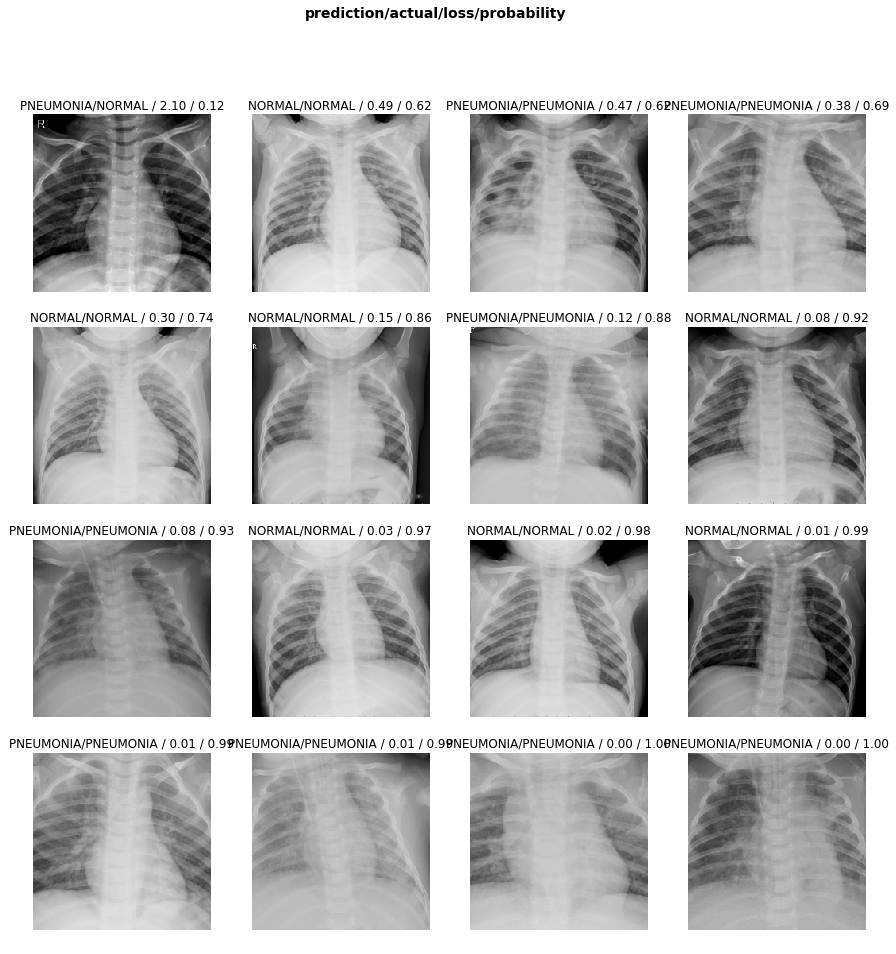

In [42]:
# prediction of the 16 x_ray images in the valid set by decreasing order of loss

interp=learn.interpret()

interp.plot_top_losses(16, figsize=(15,15))


**Comments** We see that only the  image in the valid set with the highest loss value was not predicted correctly.